understand instance,label format for https://github.com/preddy5/segnet

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [35]:
# opencv loads image as height, width, BGR.
x = cv2.imread("../test/scene.png")

In [33]:
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(360, 480, 3)


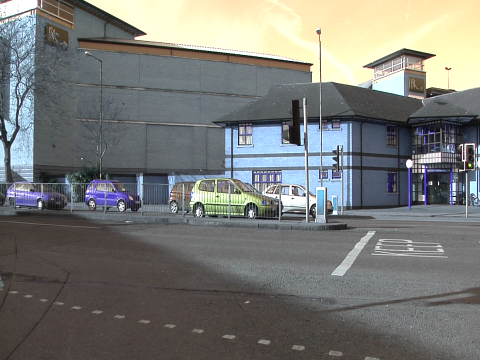

In [71]:
Image.fromarray(x)

In [72]:
def flip_channels(x):
    return x[:,:,::-1]

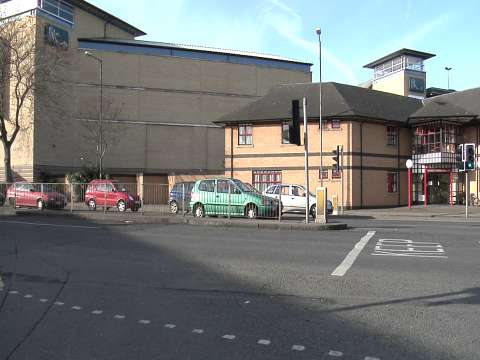

In [73]:
Image.fromarray(flip_channels(x))

In [101]:
# keras model expects input_shape=(img_channels, img_height, img_width)
# (K.set_image_data_format("channels_first"))
# move BGR axis to front. (360, 480, 3) => (3, 360, 480)
x = np.rollaxis(x, 2)

# also normalise
x = x/255

array([[[ 0.41568627,  0.44313725,  0.4745098 , ...,  1.        ,
          1.        ,  1.        ],
        [ 0.56862745,  0.38823529,  0.34509804, ...,  1.        ,
          1.        ,  1.        ],
        [ 0.56470588,  0.51764706,  0.58431373, ...,  1.        ,
          1.        ,  1.        ],
        ..., 
        [ 0.25490196,  0.24313725,  0.25098039, ...,  0.42745098,
          0.42352941,  0.42745098],
        [ 0.25098039,  0.25098039,  0.25490196, ...,  0.40392157,
          0.41568627,  0.44313725],
        [ 0.25098039,  0.25098039,  0.24313725, ...,  0.42352941,
          0.41568627,  0.40784314]],

       [[ 0.39607843,  0.44705882,  0.49411765, ...,  0.90588235,
          0.89803922,  0.89803922],
        [ 0.55686275,  0.36862745,  0.29411765, ...,  0.90196078,
          0.89411765,  0.89019608],
        [ 0.52156863,  0.38823529,  0.35686275, ...,  0.90588235,
          0.89411765,  0.89803922],
        ..., 
        [ 0.22745098,  0.21568627,  0.22352941, ...,

(360, 480, 3)
classes=11


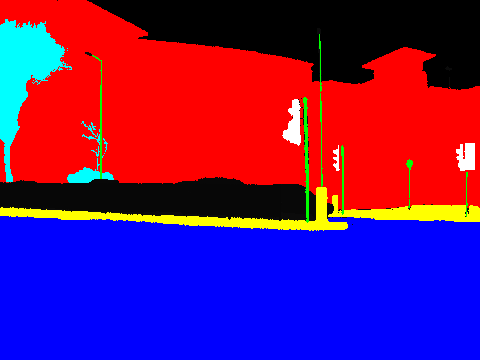

In [100]:
# mask from camvid dataset
# R = G = B. class = 0,1,2,..11 (12 classes)
y = cv2.imread("../test/label.png")
print(y.shape)
print("classes={}".format(np.max(y)))
# have a look at 1:6
y[y[:,:,0] == 1] = [255, 0, 0]
y[y[:,:,0] == 2] = [0, 255, 0]
y[y[:,:,0] == 3] = [0, 0, 255]
y[y[:,:,0] == 4] = [255, 255, 0]
y[y[:,:,0] == 5] = [0, 255, 255]
y[y[:,:,0] == 6] = [255, 255, 255]
Image.fromarray(y)

* training instances = (#images, height, width, 3). normalised by: BGR/255.
* labels = (#images, width*height, #classes). flattened. each class is binary.